In [241]:
# Data source libraries
import quandl
import iexfinance
from iexfinance.refdata import get_symbols
from iexfinance.stocks import Stock
from iexfinance.stocks import get_historical_data
# Data handling libraries
import pandas as pd
import pandas_datareader.data as web
import datetime as dt
import numpy as np

In [279]:
#plotting libraries
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib notebook 
#enables zooming in of plots in jupyter notebook
# https://stackoverflow.com/questions/10655217/ipython-notebook-pylab-inline-zooming-of-a-plot 
import matplotlib.dates as dates
from ggplot import *

In [213]:
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
# https://stackoverflow.com/questions/42373104/since-matplotlib-finance-has-been-deprecated-how-can-i-use-the-new-mpl-finance

Obtained an error saying that 'cannot import name 'Timestamp' from 'pandas.lib'. Found the fix in:
https://stackoverflow.com/questions/50591982/importerror-cannot-import-name-timestamp

### Data gathering

Downloaded my fund positions from my 401k account. 

In [4]:
inv = pd.read_csv('Portfolio_Position_May-01-2019.csv') # read the csv with one of the reports for daily open and close prices

In [5]:
sym = list(inv['Symbol']) #the symbols

Now have to fetch the data from quandl for all the symbols

In [6]:
sym1 = sym[1:len(sym)-3] #remove the unneeded symbols

In [282]:
sym2 = [i for i in sym1 if not i.startswith('CORE')] #remove the symbol CORE because it is not a valid Ticker symbol

In [283]:
print(sym2)

['IWL', 'FUTY', 'FDSVX', 'FREL', 'FDRR', 'IVW', 'IUSG', 'FTEC', 'ITA', 'FNCMX', 'ITOT', 'IVV', 'IJR', 'FIDU', 'FSTA', 'IUSV', 'IJT', 'FNCL', 'IJK', 'FLCEX', 'FMAGX', 'FHLC', 'IBB', 'IWC', 'FLPSX', 'FENY', 'FOCPX', 'FDIS', 'FXAIX', 'FSTA', 'FHLC', 'FNCL', 'FUTY', 'FZILX', 'FNILX', 'FZROX', 'FZIPX', 'FENY', 'FDEEX']


In [15]:
from iexfinance.stocks import get_historical_data

In [35]:
start = pd.datetime(2017, 2, 9)
end = pd.datetime(2017, 5, 24)

In [36]:
get_historical_data("IWL", output_format='pandas', start=start, end=end).head()

,open,high,low,close,volume
date,,,,,
2017-02-09,50.0830,50.3125,50.0830,50.3122,5947
2017-02-10,50.5132,50.5132,50.4343,50.4343,1278
2017-02-13,50.5803,50.8099,50.5803,50.7812,7012
2017-02-14,50.6951,51.0240,50.6951,50.9916,7157
2017-02-15,50.9725,51.1734,50.9725,51.1734,1844


In [11]:
style.use('ggplot')

start = dt.datetime(2015, 1, 1)
end = dt.datetime.now()

###### Remotely accessing the stock database from a variety of databases
https://pandas-datareader.readthedocs.io/en/latest/remote_data.html

In [19]:
df = web.DataReader("IWL", 'yahoo', start, end)

In [37]:
print(df.head())
print(df.shape)

                 High        Low       Open      Close   Volume  Adj Close
Date                                                                      
2015-01-02  46.900002  46.580002  46.900002  46.740002   5000.0  43.230007
2015-01-05  46.450001  45.830002  46.430000  45.950001   2900.0  42.499329
2015-01-06  46.000000  45.270000  45.939999  45.599998  14400.0  42.175602
2015-01-07  46.049999  45.740002  45.889999  46.049999   2600.0  42.591808
2015-01-08  46.869999  46.459999  46.459999  46.779999   3500.0  43.266991
(1090, 6)


https://stackoverflow.com/questions/22991567/pandas-yahoo-finance-datareader

In [31]:
%%time
d = {}
for ticker in sym2:
    d[ticker] = web.DataReader(ticker, "yahoo", '2014-12-01')
pan = pd.Panel(d)
#df1 = pan.minor_xs('Adj Close')


Wall time: 35.4 s


C:\Users\Kumar\Anaconda3\lib\site-packages\IPython\core\magics\execution.py:1237: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  exec(code, glob, local_ns)


In [65]:
print(type(pan))
print(pan.shape)
pan

<class 'pandas.core.panel.Panel'>
(34, 1112, 6)


<class 'pandas.core.panel.Panel'>
Dimensions: 34 (items) x 1112 (major_axis) x 6 (minor_axis)
Items axis: IWL to FDEEX
Major_axis axis: 2014-12-01 00:00:00 to 2019-05-02 00:00:00
Minor_axis axis: High to Adj Close

In [66]:
# Data in panel format
pan.iloc[:,:,1].head()

,IWL,FUTY,FDSVX,FREL,FDRR,IVW,IUSG,FTEC,ITA,FNCMX,...,FLPSX,FENY,FOCPX,FDIS,FXAIX,FZILX,FNILX,FZROX,FZIPX,FDEEX
Date,,,,,,,,,,,,,,,,,,,,,
2014-12-01,46.750000,29.480000,23.520000,NaN,NaN,111.940002,39.099998,31.660000,112.930000,62.980000,...,50.369999,22.660000,8.212,28.750000,73.089996,NaN,NaN,NaN,NaN,12.02
2014-12-02,46.939999,29.660000,23.719999,NaN,NaN,112.129997,39.130001,31.700001,113.050003,63.360001,...,50.549999,22.860001,8.273,28.780001,73.570000,NaN,NaN,NaN,NaN,12.07
2014-12-03,47.220001,29.709999,23.840000,NaN,NaN,112.699997,39.349998,31.870001,113.230003,63.610001,...,50.709999,23.400000,8.290,28.790001,73.860001,NaN,NaN,NaN,NaN,12.11
2014-12-04,47.029999,29.730000,23.850000,NaN,NaN,112.660004,39.279999,31.969999,113.339996,63.549999,...,50.520000,23.200001,8.292,28.740000,73.779999,NaN,NaN,NaN,NaN,12.10
2014-12-05,47.310001,29.520000,23.930000,NaN,NaN,113.040001,39.430000,32.020000,113.870003,63.700001,...,50.560001,23.020000,8.307,28.850000,73.900002,NaN,NaN,NaN,NaN,12.11


In [80]:
# Data in dictionay format
d['IWL'].index

DatetimeIndex(['2014-12-01', '2014-12-02', '2014-12-03', '2014-12-04',
               '2014-12-05', '2014-12-08', '2014-12-09', '2014-12-10',
               '2014-12-11', '2014-12-12',
               ...
               '2019-04-18', '2019-04-22', '2019-04-23', '2019-04-24',
               '2019-04-25', '2019-04-26', '2019-04-29', '2019-04-30',
               '2019-05-01', '2019-05-02'],
              dtype='datetime64[ns]', name='Date', length=1112, freq=None)

In [82]:
d['IWL'].columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

The data from each ticekr value consists of 6 columns: ['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close']. There are 34 tickers. The data can be visualized in the mind as a 3D data of the type m x n x p. Where m is date (which is the index), n are the columns and p is for tickerr. <br>

But I found that a dictionary of dataframe where the keys are the tickers and the values are a 2D dataframe of m x n type as the one that would be more natural to work with. 

If the need arises to convert Pandas Panel to dataframe<br>
https://stackoverflow.com/questions/47400042/pandas-panel-to-dataframe-indexing<br>
https://stackoverflow.com/questions/44935324/transform-pandas-panel-into-dataframe<br>

### Plotting the time series

First restructure the dictioanry to dataframe of Adj Close prices for each ticker. The tickers will constitute the columns and the dates will be rows

In [121]:
for key in d.keys():    
    t1 = [d[key]['Adj Close']for key in d.keys()] # list of list of Adj Close for each ticker

In [166]:
df_adjCl = pd.DataFrame(t1).T # row for data, column for ticker
df_adjCl.columns=d.keys() #assignign the keys as the column names for each ticker

In [167]:
df_adjCl.head()

,IWL,FUTY,FDSVX,FREL,FDRR,IVW,IUSG,FTEC,ITA,FNCMX,...,FLPSX,FENY,FOCPX,FDIS,FXAIX,FZILX,FNILX,FZROX,FZIPX,FDEEX
Date,,,,,,,,,,,,,,,,,,,,,
2014-12-01,42.986290,25.480989,21.342649,NaN,NaN,105.194412,36.043022,30.101650,107.995308,59.010342,...,36.937294,20.371849,6.411653,27.132828,64.750137,NaN,NaN,NaN,NaN,9.769724
2014-12-02,43.270832,25.661156,21.524132,NaN,NaN,105.738457,36.190399,30.177425,108.368103,59.366390,...,37.069290,20.628489,6.459280,27.208303,65.175385,NaN,NaN,NaN,NaN,9.810363
2014-12-03,43.463600,25.609678,21.633024,NaN,NaN,106.123016,36.379223,30.347919,109.171036,59.600639,...,37.186619,20.893976,6.472553,27.264912,65.432274,NaN,NaN,NaN,NaN,9.842875
2014-12-04,43.362633,25.618256,21.642103,NaN,NaN,106.085510,36.346985,30.376329,108.664429,59.544415,...,37.047295,20.708134,6.474114,27.208303,65.361412,NaN,NaN,NaN,NaN,9.834747
2014-12-05,43.500320,25.446669,21.714693,NaN,NaN,106.226204,36.370026,30.395281,109.591637,59.684963,...,37.076622,20.460348,6.485826,27.217737,65.467720,NaN,NaN,NaN,NaN,9.842875


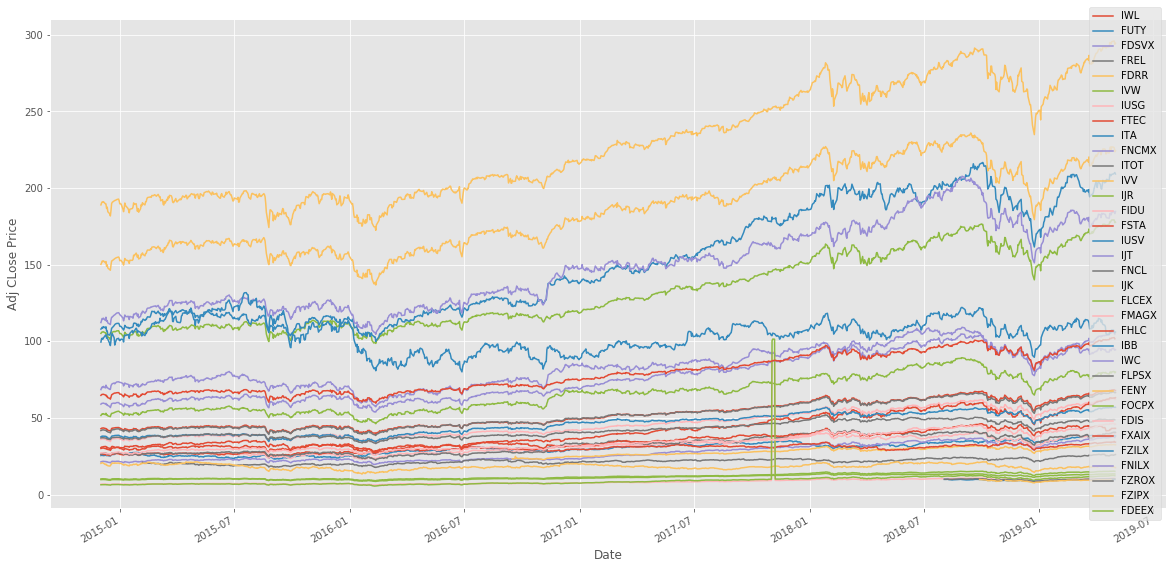

In [177]:
# plotting all the columns in a single plot
# plt.figure(figsize=(20,10))
df_adjCl.plot.line(figsize=(20,10))
plt.xlabel('Date')
plt.ylabel('Adj CLose Price')
plt.legend(loc=5) #moves the legends to the right side of display
plt.show()

To do it in ggplot, because it has many more options for customization, first we have to convert the date from index to a normal numeric column

In [206]:
df_adjCl1 = df_adjCl.reset_index() # reset the date from index to just another column so that it can be used as an axis

In [207]:
df_adjCl1['Date']= dates.date2num(df_adjCl1['Date'])

Have to convert Pandas Panel to dataframe<br>
https://stackoverflow.com/questions/47400042/pandas-panel-to-dataframe-indexing<br>
https://stackoverflow.com/questions/44935324/transform-pandas-panel-into-dataframe<br>

### Correlations

In [234]:
df_adjCl_corr = df_adjCl.corr()

In [235]:
print(df_adjCl_corr.head())

            IWL      FUTY     FDSVX      FREL      FDRR       IVW      IUSG  \
IWL    1.000000  0.893336  0.990343  0.857744  0.996574  0.996545  0.997491   
FUTY   0.893336  1.000000  0.859461  0.942779  0.788007  0.882980  0.883621   
FDSVX  0.990343  0.859461  1.000000  0.829107  0.980529  0.996299  0.995682   
FREL   0.857744  0.942779  0.829107  1.000000  0.760741  0.851518  0.851869   
FDRR   0.996574  0.788007  0.980529  0.760741  1.000000  0.988369  0.989287   

           FTEC       ITA     FNCMX    ...        FLPSX      FENY     FOCPX  \
IWL    0.995444  0.992221  0.996029    ...     0.976109  0.309007  0.413591   
FUTY   0.882599  0.874802  0.867849    ...     0.812941  0.082110  0.376515   
FDSVX  0.995025  0.984529  0.996020    ...     0.972521  0.294151  0.416290   
FREL   0.846401  0.824889  0.835949    ...     0.776239  0.255565  0.344698   
FDRR   0.980781  0.972940  0.983268    ...     0.939407  0.278065  0.232597   

           FDIS     FXAIX     FZILX     FNILX     

In [236]:
df_adjCl_corr_vals = df_adjCl_corr.values

In [239]:
df_adjCl_corr.columns

Index(['IWL', 'FUTY', 'FDSVX', 'FREL', 'FDRR', 'IVW', 'IUSG', 'FTEC', 'ITA',
       'FNCMX', 'ITOT', 'IVV', 'IJR', 'FIDU', 'FSTA', 'IUSV', 'IJT', 'FNCL',
       'IJK', 'FLCEX', 'FMAGX', 'FHLC', 'IBB', 'IWC', 'FLPSX', 'FENY', 'FOCPX',
       'FDIS', 'FXAIX', 'FZILX', 'FNILX', 'FZROX', 'FZIPX', 'FDEEX'],
      dtype='object')

In [238]:
print(type(df_adjCl_corr))
print(type(df_adjCl_corr_vals)) # 

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


<IPython.core.display.Javascript object>


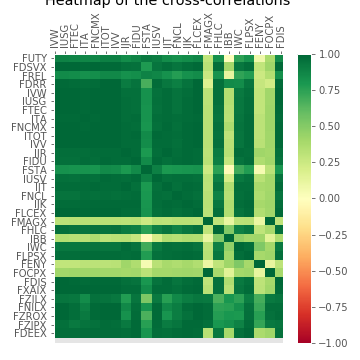

In [281]:
# Generate a heatmap of the cross-correlations

def plot_heatmap_of_crosscorr(data):
    '''data is a dataframe with date as index and ticker as columns.
    The values of the columns are the ticker values chosne to construct the dataframe.
    The function first calculated the cross-correlations.
    Then it plots the cross-correlations values to heatmap
    '''
    
    data_corr = data.corr()
    crosscorr_vals = data_corr
    fig1 = plt.figure(figsize=(5,5))
    ax1 = fig1.add_subplot(111)
    heatmap1 = ax1.pcolor(crosscorr_vals, cmap=plt.cm.RdYlGn)
    fig1.colorbar(heatmap1)
    ax1.set_xticks(np.arange(crosscorr_vals.shape[1]) + 0.5, minor=False)
    ax1.set_yticks(np.arange(crosscorr_vals.shape[0]) + 0.5, minor=False)
    ax1.invert_yaxis()
    ax1.xaxis.tick_top()
    column_labels = data_corr.columns
    row_labels = data_corr.index
    ax1.set_xticklabels(column_labels)
    ax1.set_yticklabels(row_labels)
    plt.xticks(rotation=90)
    heatmap1.set_clim(-1,1)
    plt.tight_layout()
    #plt.savefig("correlations.png", dpi = (300))
    plt.title('Heatmap of the cross-correlations')
    plt.show()
    
plot_heatmap_of_crosscorr(df_adjCl)

Looking at the figure we're interested in the regions that is towards the warmer end of the spectrum (red). 

In [319]:
# the least correlated pairs are
df_adjCl_corr.unstack().sort_values(kind='quicksort').head(20)

IBB    FSTA    -0.026920
FSTA   IBB     -0.026920
FUTY   IBB      0.013409
IBB    FUTY     0.013409
FENY   FSTA     0.051171
FSTA   FENY     0.051171
FENY   FUTY     0.082110
FUTY   FENY     0.082110
FENY   FMAGX    0.102688
FMAGX  FENY     0.102688
IBB    FMAGX    0.116115
FMAGX  IBB      0.116115
IBB    FREL     0.121043
FREL   IBB      0.121043
FOCPX  FENY     0.124104
FENY   FOCPX    0.124104
FOCPX  IBB      0.150006
IBB    FOCPX    0.150006
FMAGX  FDRR     0.176631
FDRR   FMAGX    0.176631
dtype: float64

These show the pair of ETFs that are least correlated with each other.

### Stock market indices

Since all the funds are based on some index, the next plan is to download all the indices and see which ones are the least correlated. The same can be done using sector data.

In [326]:
import bs4 as bs
import pickle
import requests
import webbrowser

In [285]:

resp = requests.get('https://en.wikipedia.org/wiki/List_of_stock_market_indices')
soup = bs.BeautifulSoup(resp.text, 'lxml')
# table = soup.find('table', {'class': 'wikitable sortable'})

In [315]:
t1 = soup.findAll('h4')

Taking too much time. Instead we will manually enter the ticker symbols for the major indices

### ETF characteristics

Metadata has to be downloaded using web scraping because the APIs do not provide a way to extract these directly from the website. The kind of metadata that seems to be of interest are: Sector, Holding, ratios, 

A guy who has done projects (in *R*) the kind that I am interested in doing: https://www.signalplot.com/

In [335]:
url = 'https://finance.yahoo.com/quote'
ticker = 'FENY'
url1 = url+'/'+ticker+'/holdings?p='+ticker
print(url1)
webbrowser.open(url1, new=1)

https://finance.yahoo.com/quote/FENY/holdings?p=FENY


True

In [337]:
req = requests.get(url1)
soup = bs.BeautifulSoup(req.text,'lxml')

In [363]:
# print(soup)

This is how an html document looks like. It has all the headers and the attributes based on which we can extract the parts e want from the webpage

In [366]:
soup.

['html',
 <html class="NoJs featurephone" id="atomic" lang="en-US"><head prefix="og: http://ogp.me/ns#"><script>window.performance && window.performance.mark && window.performance.mark('PageStart');</script><meta charset="utf-8"/><title>FENY Holdings | Fidelity MSCI Energy Index ETF Stock - Yahoo Finance</title><meta content="Top holdings, Holdings, Portfolio Composition, Equity Holdings, Sector Weightings, Bond holdings, Bond Ratings" name="keywords"/><meta content="on" http-equiv="x-dns-prefetch-control"/><meta content="on" property="twitter:dnt"/><meta content="90376669494" property="fb:app_id"/><meta content="#400090" name="theme-color"/><meta content="width=device-width, initial-scale=1" name="viewport"/><meta content="View Top Holdings and Key Holding Information for Fidelity MSCI Energy Index ETF (FENY)." lang="en-US" name="description"/><meta content="guce.yahoo.com" name="oath:guce:consent-host"/><link href="/manifest.json" rel="manifest"/><link href="//l.yimg.com" rel="dns-pr

In [347]:
sector_weigths = soup.findAll('div',class_='Mb(25px)')

In [359]:
for t1 in sector_weigths:
#     t2 = t1.attrs()
    print('='*40)
    print(type(t1))    
    print(t1)

<class 'bs4.element.Tag'>
<div class="Mb(25px) " data-reactid="4"><h3 data-reactid="5"><span data-reactid="6">Overall Portfolio Composition (%)</span></h3><div data-reactid="7"><div class="Bdbw(1px) Bdbc($screenerBorderGray) Bdbs(s) H(25px) Pt(10px)" data-reactid="8"><span class="Fl(start)" data-reactid="9"><span class="Mend(5px) Whs(nw)" data-reactid="10"><span data-reactid="11">Stocks</span></span></span><span class="Fl(end)" data-reactid="12">99.94%</span></div><div class="Bdbw(1px) Bdbc($screenerBorderGray) Bdbs(s) H(25px) Pt(10px)" data-reactid="13"><span class="Fl(start)" data-reactid="14"><span class="Mend(5px) Whs(nw)" data-reactid="15"><span data-reactid="16">Bonds</span></span></span><span class="Fl(end)" data-reactid="17">0.00%</span></div></div></div>
<class 'bs4.element.Tag'>
<div class="Mb(25px) " data-reactid="18"><h3 data-reactid="19"><span data-reactid="20">Sector Weightings (%)</span></h3><div data-reactid="21"><div class="Bdbw(1px) Bdbc($screenerBorderGray) Bdbs(s) H

In [361]:
t3 = soup.find('span', {'class': 'Sector Weightings'})
print(t3)

None


### Data mining

Probably use similarity finding algos like Classification(kNN, SVM) or Neural Networks.